In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Veri setini yükleme
data = pd.read_csv("veri-seti.txt", sep="\t")

# Bağımsız değişkenler (X) ve hedef değişken (y) olarak ayırma
X = data.drop("Class", axis=1)
y = data["Class"]

# Veri setini eğitim ve test setlerine ayır (70% eğitim, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizasyon uygulama
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# MLP sınıflandırıcı modelini oluştur ve eğitme
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_scaled, y_train)

# SVM sınıflandırıcı modelini oluştur ve eğitme
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SVC(kernel='linear', random_state=42)

In [14]:
# MLP sınıflandırıcının performansı
mlp_pred = mlp.predict(X_test_scaled)
mlp_cm = confusion_matrix(y_test, mlp_pred)
mlp_cr = classification_report(y_test, mlp_pred)

# SVM sınıflandırıcının performansı
svm_pred = svm.predict(X_test_scaled)
svm_cm = confusion_matrix(y_test, svm_pred)
svm_cr = classification_report(y_test, svm_pred)

# Sonuçları raporlama
print("MLP Sınıflandırıcı Performansı:")
print("Confusion Matrix:")
print(mlp_cm)
print("Classification Report:")
print(mlp_cr)
print("\n")

print("SVM Sınıflandırıcı Performansı:")
print("Confusion Matrix:")
print(svm_cm)
print("Classification Report:")
print(svm_cr)


MLP Sınıflandırıcı Performansı:
Confusion Matrix:
[[118  33]
 [ 33  47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       151
           1       0.59      0.59      0.59        80

    accuracy                           0.71       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231



SVM Sınıflandırıcı Performansı:
Confusion Matrix:
[[123  28]
 [ 30  50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.64      0.62      0.63        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



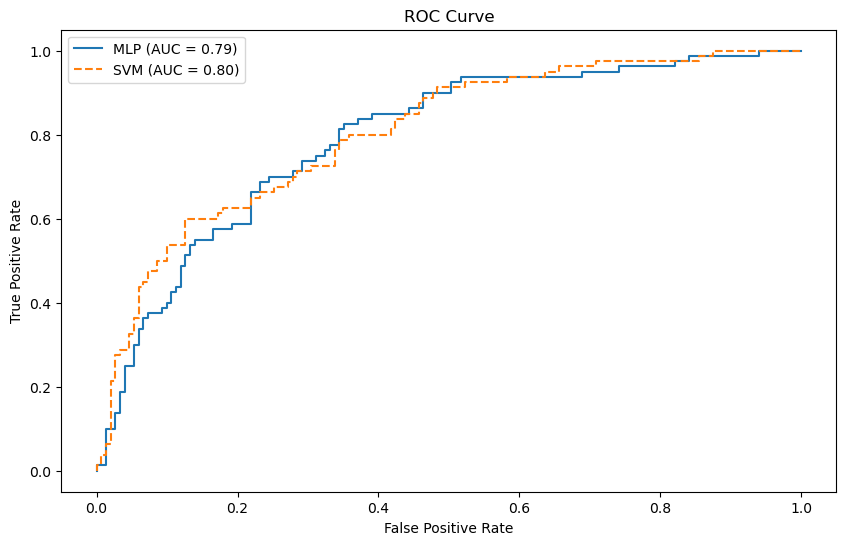

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# MLP için ROC eğrisi
mlp_probs = mlp.predict_proba(X_test_scaled)[:, 1]
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)
mlp_auc = roc_auc_score(y_test, mlp_probs)

# SVM için ROC eğrisi
svm_probs = svm.decision_function(X_test_scaled)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

# ROC eğrilerini çizdirme
plt.figure(figsize=(10, 6))
plt.plot(mlp_fpr, mlp_tpr, linestyle='-', label='MLP (AUC = %0.2f)' % mlp_auc)
plt.plot(svm_fpr, svm_tpr, linestyle='--', label='SVM (AUC = %0.2f)' % svm_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
